In [35]:
# Import necessary libraries
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
import matplotlib.pyplot as plt  # For plotting and visualization
from sklearn.compose import ColumnTransformer  # For applying transformations to specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling and encoding features
from sklearn.pipeline import Pipeline  # For creating a machine learning pipeline
from sklearn.metrics import r2_score
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor  # For building a random forest regression model


In [36]:

# Load the dataset
# The dataset is assumed to be a CSV file where data is separated by semicolons (';').
table = pd.read_csv("student-por.csv", sep=";")
table

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [37]:
# Split the data into features (X) and target variable (y)
# 'G3' is the target variable (final grade), and it is removed from the features.
x = table.drop(columns=['G3'])  # Exclude G1, G2, and G3 from features
y = table['G3']  # Target variable (final grade)


In [38]:
# Separate categorical and numerical columns
cat_col = x.select_dtypes(include=['object']).columns  # Categorical columns
num_col = x.select_dtypes(include=['int64']).columns  # Numerical columns

In [39]:
# Define transformations for numerical and categorical columns
number_transformer = StandardScaler()  # Standardize numerical features (mean=0, std=1)
category_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encode categorical features


In [40]:
category_x = pd.get_dummies(x[cat_col])
numerical_features = x[num_col]
x = pd.concat([category_x,numerical_features],axis=1)
x

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,True,False,True,False,False,True,True,False,True,False,...,0,4,3,4,1,1,3,4,0,11
1,True,False,True,False,False,True,True,False,False,True,...,0,5,3,3,1,1,3,2,9,11
2,True,False,True,False,False,True,False,True,False,True,...,0,4,3,2,2,3,3,6,12,13
3,True,False,True,False,False,True,True,False,False,True,...,0,3,2,2,1,1,5,0,14,14
4,True,False,True,False,False,True,True,False,False,True,...,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,True,True,False,True,False,True,False,False,True,...,1,5,4,2,1,2,5,4,10,11
645,False,True,True,False,False,True,False,True,False,True,...,0,4,3,4,1,1,1,4,15,15
646,False,True,True,False,False,True,True,False,False,True,...,0,1,1,1,1,1,5,6,11,12
647,False,True,False,True,False,True,False,True,False,True,...,0,2,4,5,3,4,2,6,10,10


In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [50]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=2000, max_depth=1000, random_state=0)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

#Randomized Search CV
# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(50, 300),  # Number of trees in the forest
    'max_depth': [None] + list(range(5, 30)),  # Maximum depth of each tree
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = regressor,
    param_distributions=param_dist
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on the test set
best_rf = random_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
# Evaluating the model
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')


Best Parameters: {'bootstrap': True, 'max_depth': 14, 'n_estimators': 255}
Best Score: 0.8531111681635387
R-squared: 0.8366932021522536


In [44]:
# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': regressor.feature_names_in_,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Print the feature importances
print("Feature Importances:")
print(importance_df)



Feature Importances:
              Feature  Importance
57                 G2    0.830376
55           absences    0.034227
56                 G1    0.017313
43                age    0.008164
50           freetime    0.008095
44               Medu    0.007161
52               Dalc    0.006517
22       reason_other    0.005417
49             famrel    0.005358
54             health    0.005223
51              goout    0.005108
46         traveltime    0.004535
53               Walc    0.004507
45               Fedu    0.004117
14       Mjob_teacher    0.003988
48           failures    0.003456
47          studytime    0.003340
0           school_GP    0.002899
1           school_MS    0.002635
12         Mjob_other    0.002224
24    guardian_father    0.001945
18      Fjob_services    0.001807
20      reason_course    0.001594
7         famsize_LE3    0.001555
6         famsize_GT3    0.001464
30         famsup_yes    0.001418
29          famsup_no    0.001371
2               sex_F    0.

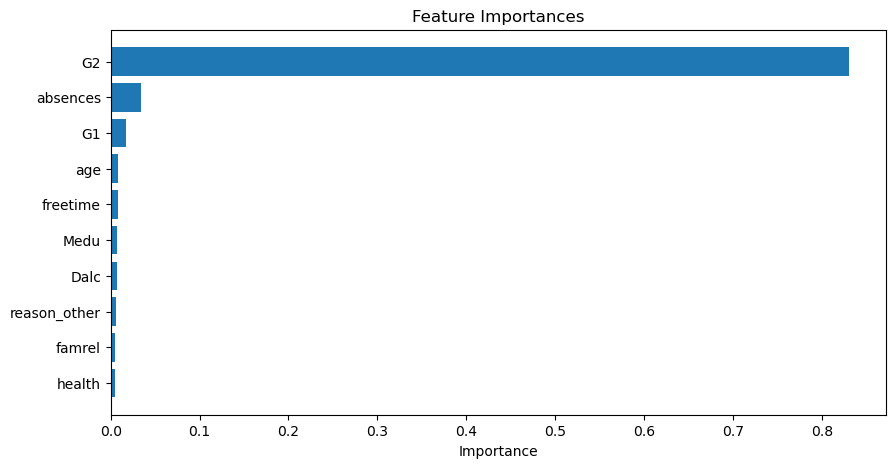

In [45]:
# Visualize the top 10 most important features
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))  # Horizontal bar plot
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


***MENTION THAT THE MODEL IS OVERFITTED***

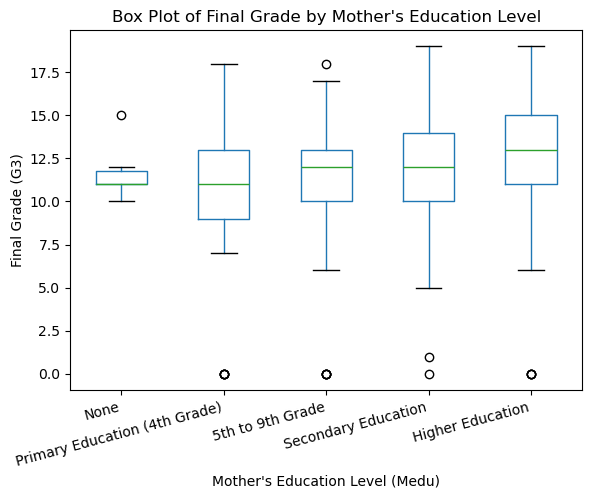

In [46]:
df = pd.DataFrame(table)

# Scatter plot
df.boxplot(column='G3', by='Medu', grid=False,rot=15)

# Add titles and labels
plt.title('Box Plot of Final Grade by Mother\'s Education Level')
plt.suptitle('')  # Remove the automatic suptitle
plt.xlabel('Mother\'s Education Level (Medu)')
plt.ylabel('Final Grade (G3)')
plt.xticks(
    ticks=[1, 2, 3, 4, 5],
    labels=[
        'None',
        'Primary Education (4th Grade)',
        '5th to 9th Grade',
        'Secondary Education',
        'Higher Education'
    ],
    rotation=15,
    ha='right'  # Align text to the right
)
# Show the plot
plt.show()


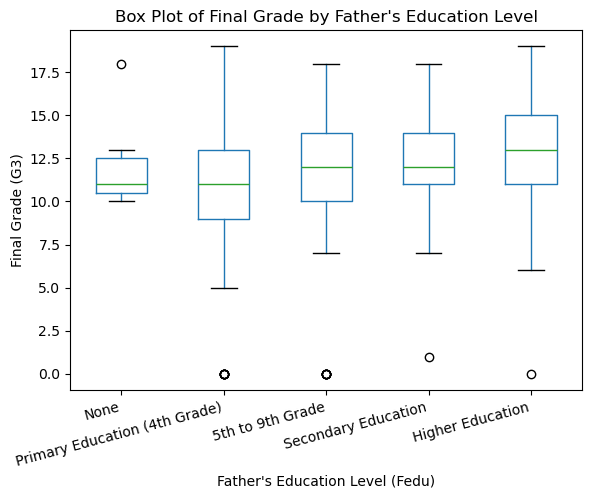

In [47]:
# Box plot for final grades (G3) by father's education level (Fedu)
df.boxplot(column='G3', by='Fedu', grid=False, rot=15)
plt.title('Box Plot of Final Grade by Father\'s Education Level')
plt.suptitle('')
plt.xlabel('Father\'s Education Level (Fedu)')
plt.ylabel('Final Grade (G3)')
plt.xticks(
    ticks=[1, 2, 3, 4, 5],
    labels=[
        'None',
        'Primary Education (4th Grade)',
        '5th to 9th Grade',
        'Secondary Education',
        'Higher Education'
    ],
    rotation=15,
    ha='right'
)
plt.show()

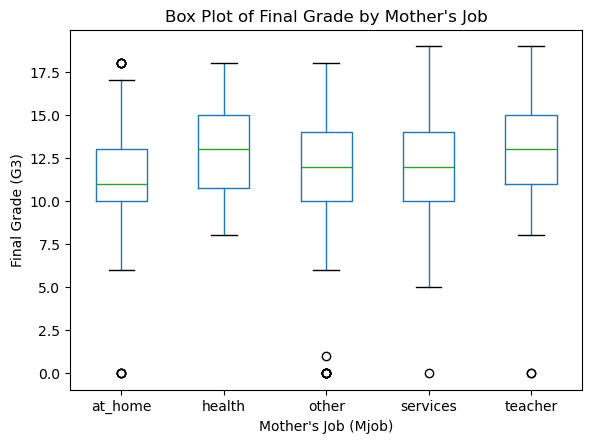

In [48]:
# Box plot for final grades (G3) by mother's job (Mjob)
df.boxplot(column='G3', by='Mjob', grid=False)
plt.title('Box Plot of Final Grade by Mother\'s Job')
plt.suptitle('')
plt.xlabel('Mother\'s Job (Mjob)')
plt.ylabel('Final Grade (G3)')
plt.show()


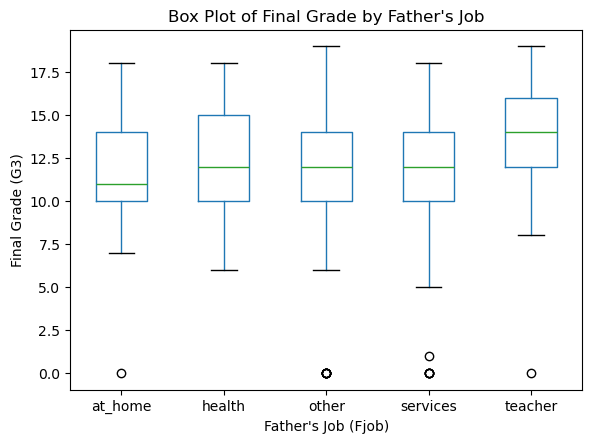

In [49]:
# Box plot for final grades (G3) by Fathers's job (Fjob)
df.boxplot(column='G3', by='Fjob', grid=False)
plt.title('Box Plot of Final Grade by Father\'s Job')
plt.suptitle('')
plt.xlabel('Father\'s Job (Fjob)')
plt.ylabel('Final Grade (G3)')
plt.show()
